<div style="display:block">
    <div style="width: 20%; display: inline-block; text-align: left;">
    </div>
    <div style="width: 59%; display: inline-block">
        <h1  style="text-align: center">Linear Regression with Tensorflow and Gradient Descent Algorithm</h1>
        <div style="width: 85%; text-align: center; display: inline-block;"><i>Authors:</i> <strong>Manoj Kumar Das </strong> </div>
    </div>
    <div style="width: 20%; text-align: right; display: inline-block;">
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Created: </i>
            <time datetime="2014-03-10" pubdate>December 5, 2017</time>
        </div>
        <div style="width: 100%; text-align: left; display: inline-block;">
            <i>Modified: </i>
            <time datetime="2014-03-12" pubdate>April 15, 2019</time>
        </div>
    </div>
</div>

#### Introduction 
In this small example notebook we will run you through on how to use tesnorflow for a simple linear regression model. The objective of this notebook is for you to understand the gradient descent algorithm and how the infulence of the learning rate is over reaching the global or local minima. For understanding and learning of gradient descent algorith, I would suggets to just google it. Gradient descent alogrithm is the basis from which most optimizers are derived, used in the parameter estimation for a lot of models and in most neural networks.  

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf 
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

We first create a data using the normal distribution to be the independant variable$x$ and then the independent variable $y$, we put a linear relationship between $x$ and $y$ with some added noise. This example is taken from [1] in refrences. Our objective as the model suggest "linear regression" is to find a line "which is the model" that best fits to this data. So our objective is to get a predicted $y$, $y_d$ value for any given value of $x$. From the line equation we have,

$y_d = W * x + b$. 

The objective is now translates to finding the right $W$ and $b$ value that best defines the right line which fits to the data in the best way. 

$W$ is initially fixed (a sampled value from a uniform distribution between -1 and 1) and $b$ is initialized to 0. With these value into consideration we determine $y_d$. A suitable loss function needs to alwasy be carfully chosen to know how wrong the model has been to determine $y_d$, in this example we use the standard mean square error loss function. 


$mse = \frac{\sum_{N}{(y_i - y_{di})^2}}{N}$

The gradient descent algorithm takes the computed loss along with another parameter called as the learning rate and determines a new value for $W$ and $b$, such that the new $y_d$ would lead to a lesser loss when evaluted against $y$. This is done iteratively until we have a convergence observed, but a lot has to do with also on the value fixed on the learning rate. The learning rate vlaue theoretically can take a value betwen zero and once, and ideally is a number fixed closer to zero. In the below code observe that the "train" object takes in a vlue of "0.4" as the learning rate. Run the belwo code and the plot will show you how the model changes with every iteration.

In [4]:
import warnings
import numpy as np
import tensorflow as tf
from IPython import display
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline
# tf.logging.set_verbosity(tf.logging.ERROR)

def linearRegression(dataPointSize, iterations):
    plt.figure(figsize=(7, 5))
    def myTrain(session, trainObject, iteration):
        global plt
        font = {'family': 'serif', 
                'color':  'blue', 
                'weight': 'normal', 
                'size': 10}
        session.run(trainObject)
        plt.clf();
        plt.plot(x.eval(session=session), y.eval(session=session), 'ro');
        plt.plot(x.eval(session=session), yReg.eval(session=session));
        plt.text(1, -0.02, 'iteration: '+ str(iteration+1), fontdict=font);
        display.display(plt.gcf());
        display.clear_output(wait=True);
#         plt.pause(0.5)
#         print('iteration = ', iteration, 'W = ', W.eval(session=session)[0], \
#               'b = ', b.eval(session=session)[0], 'loss = ', loss.eval(session=session), \
#               'x = ', x.eval(session=session)[0], 'y = ', y.eval(session=session)[0])
    seed = np.random.normal(0, 0.5, dataPointSize)
    with tf.device('/device:CPU:0'):
        x = tf.constant(seed, dtype=tf.float32)
        y = tf.constant(0.1 * seed + 0.2 + \
                np.random.normal(0, 0.08, dataPointSize), dtype=tf.float32)
        W = tf.Variable(tf.zeros([1]))
        b = tf.Variable(tf.zeros([1]))
        yReg = W * x + b
        loss = tf.reduce_mean(tf.square(y - yReg))
        train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    all(list(map(lambda x: myTrain(sess, train, x), range(iterations))));

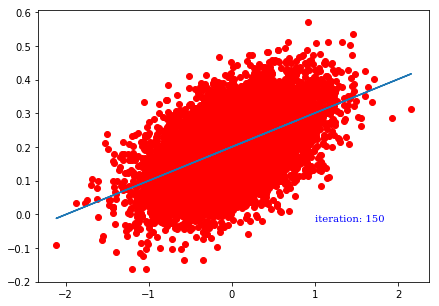

In [5]:
linearRegression(10000, 150)

Your next objective is now to understand what "over stepping" is. If this is something you have covered while learning gradient descent algorithm, this means you know that the learning rate parameter when not appropriate will always skew away from reaching the required minima of your loss function. Try increasing the learning rate value in the above code to some value closer to one and replicate the occurance of over-stepping. This will help you understand over-stepping much better.  

#### Refrences
[1] [First contact with Tensorflow](http://jorditorres.org/research-teaching/tensorflow/first-contact-with-tensorflow-book/first-contact-with-tensorflow/)

To The King